In [1]:
%pip install rebound

Note: you may need to restart the kernel to use updated packages.


In [2]:
a= [ 0.0677, 0.1189, 0.1662 , 0.2138, 0.2535] #au

In [3]:
import rebound
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [116]:
mass_earth = 3*10**-6 #solar masses
start_x = [0.06769998,  1.18900000e-01  , 0.1662    , 0.2138    , 0.2535]
start_y = [5.01579636e-05,0,  3.76400590e-05, 1.23601018e-05, 2.72122722e-06]
v0x = np.array( [0.07462658395619551, 0.05659626765330703, 0.04790208125104128, 0.04224355397579091, 0.03884847500678671])
v0x= [0.0746266044379049,0.05659626765330703,0.04790208247950675,0.042243554046383504,0.038848475009025]
v0y = np.array([5.52897859478072e-05, 0.0, 1.0848599329982713e-05, 2.4421638303104e-06, 4.170237775156792e-07])
P = [ 5.7,  13.2,21.8,31.8, 41]
v0y = np.zeros(5)

theta = [0.000740885792975013, 0, 0.00022647448422232177, 5.781151436712105e-05, 1.073462413715875e-05]

In [118]:
kep33 = rebound.Simulation() # This sets up our system
# kep33.integrator = 'whfast'

# hmmm what units?
# star = kep33.add(m=1.29,x=0,y=0,z=0) #star
# kepb = kep33.add(m=3.68*mass_earth,x = start_x[0] , y =  start_y[0], z = 0, vx = v0x[0],vy= v0y[0], P =P[0],a=a[0]) #closest
# kepc = kep33.add(m=0.39*mass_earth,x = start_x[1] , y =start_y[1],z = 0 ,vx = v0x[1], vy = v0y[1], P=P[1],a=a[1])
# kepd = kep33.add(m=3.91*mass_earth,x = start_x[2] , y = start_y[2] ,z = 0 ,vx = v0x[2],vy = v0y[2],P=P[2],a=a[2])
# kepe = kep33.add(m=5.57*mass_earth,x = start_x[3], y = start_y[3] ,z = 0,vx = v0x[3], vy= v0y[3],P=P[3],a=a[3])
# kepf = kep33.add(m=9.6*mass_earth, x = start_x[4] , y = start_y[4] ,z = 0,vx = v0x[4], vy= v0y[4],P=P[4],a=a[4]) #farthest

star = kep33.add(m=1.29)#,x=0,y=0,z=0) #star
kepb = kep33.add(m=3.68*mass_earth,a=a[0], f=theta[0]) #closest
kepc = kep33.add(m=0.39*mass_earth,a=a[1], f= theta[1])
kepd = kep33.add(m=3.91*mass_earth,a=a[2], f= theta[2])
kepe = kep33.add(m=5.57*mass_earth,a=a[3],f= theta[3])
kepf = kep33.add(m=9.6*mass_earth, a=a[4], f= theta[4]) #farthest



kep33.move_to_com() # Moving our system to the centre of mass frame, which should be in the star.

In [119]:
print(kep33.particles[1].y)

5.015697123383606e-05


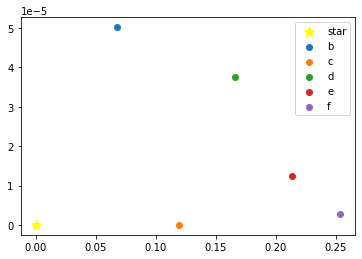

In [120]:
plt.scatter(kep33.particles[0].x,kep33.particles[0].y, label = 'star',s=100,marker =(5,1),color = 'yellow')
plt.scatter(kep33.particles[1].x,kep33.particles[1].y, label = 'b')
plt.scatter(kep33.particles[2].x,kep33.particles[2].y, label = 'c')
plt.scatter(kep33.particles[3].x,kep33.particles[3].y, label = 'd')
plt.scatter(kep33.particles[4].x,kep33.particles[4].y, label = 'e')
plt.scatter(kep33.particles[5].x,kep33.particles[5].y, label = 'f')
plt.legend()


In [121]:

times = np.arange(0,200) # 30 randomly spaced observations
N = len(times) 
# times =times[0:174]
p1,p2,p3,p4,p5 = np.zeros((N,2)), np.zeros((N,2)),np.zeros((N,2)),np.zeros((N,2)),np.zeros((N,2))

for i, t in enumerate(times):
#     print(i)
    kep33.integrate(times[i])
#     print(i)
    p1[i] = np.array([kep33.particles[1].x, kep33.particles[1].y])
    p2[i] = np.array([kep33.particles[2].x, kep33.particles[2].y])
    p3[i] = np.array([kep33.particles[3].x, kep33.particles[3].y])
    p4[i] = np.array([kep33.particles[4].x, kep33.particles[4].y])
    p5[i] = np.array([kep33.particles[5].x, kep33.particles[5].y])

        


In [122]:
def plot(self,clear=True,lims=None):
    if clear:
        plt.clf()
    plt.plot(self[:,0],self[:,1],'.')
    if not(lims is None):
        plt.axis(lims)
    plt.pause(0.0001)

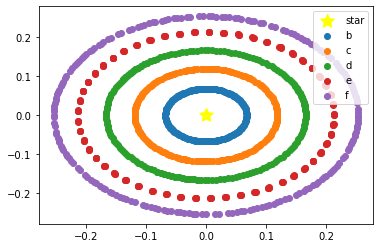

In [123]:
plt.scatter(kep33.particles[0].x,kep33.particles[0].y, label = 'star',s=200,marker =(5,1),color = 'yellow')
plt.scatter(p1[:, 0], p1[:, 1], label = 'b')
plt.scatter(p2[:, 0], p2[:, 1], label = 'c')
plt.scatter(p3[:, 0], p3[:, 1], label = 'd')
plt.scatter(p4[:, 0], p4[:, 1], label = 'e')
plt.scatter(p5[:, 0], p5[:, 1], label = 'f')
plt.legend()


plt.show()


AttributeError: 'list' object has no attribute 'shape'

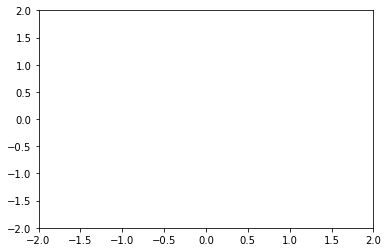

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)  # Set the x-axis limit, adjust according to your data
ax.set_ylim(-2, 2)  # Set the y-axis limit, adjust according to your data

# Number of time steps and planets
n_points = planet_positions.shape[0]  # Derived from the length of the time steps
n_planets = 5  # You have 5 planets (p1 to p5)
planet_names = ['a', 'b', 'c', 'd', 'e']########################################################################

# Initialize the scatter plot for the planets (p1 to p5)
planet_scatter = [ax.plot([], [], 'o', markersize=6, label=planet_names[i])[0] for i in range(n_planets)]

# Initialize the lines for the trails (dotted lines)
trail_lines = [ax.plot([], [], linestyle=':', color='gray')[0] for _ in range(n_planets)]

# List of planet names (optional, for labeling or annotations)

# Function to initialize the plot for animation
def init():
    # Initialize empty data for planets and trails
    for planet in planet_scatter:
        planet.set_data([], [])
    for trail in trail_lines:
        trail.set_data([], [])
    return planet_scatter + trail_lines

# Function to update the plot for each frame of the animation
def update(frame):
    # Update each planet's position and trail
    for i in range(n_planets):
        # Get the current position of the planet at the current time step (frame)
        x, y = planet_positions[frame, i]
        
        # Update the planet's position on the plot
        planet_scatter[i].set_data(x, y)
        
        # Update the planet's trail by adding the previous points up to the current frame
        trail_x = planet_positions[:frame + 1, i, 0]
        trail_y = planet_positions[:frame + 1, i, 1]
        trail_lines[i].set_data(trail_x, trail_y)
    
    return planet_scatter + trail_lines

# Create the animation
ani = FuncAnimation(fig, update, frames=n_points, init_func=init, blit=True, interval=100)

# Display the animation
plt.legend()  # Optionally show a legend for planets p1 to p5
plt.show()


In [ ]:
def plot(self,clear=True,lims=None):
    if clear:
        plt.clf()
    plt.plot(self.x[:,0],self.x[:,1],'.')
    if not(lims is None):
        plt.axis(lims)
#     plt.pause(0.0001)